# Statistics and Trends 
#### Titanic Dataset Analysis
**Name:** [Musawir Hussain]
**Student Number:** [23102762]  

## 1. Importing Libraries and Dataset
In this section, we import the necessary libraries for data analysis and visualization and load the Titanic dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load slected dataset
df = pd.read_csv('Titanictrain.csv')
# Structure of tthe data
df.head()


## 2. Data Cleaning and Missing Values
This section handles missing values by filling them in specific columns (`Age`, `Cabin`, `Embarked`) as per the dataset requirements.

In [16]:
# Code for handling missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Check for remaining missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## 3. Descriptive Statistics

Here, we display basic descriptive statistics to understand the distribution and range of the numerical data.


In [19]:
# Code for descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)



Descriptive Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## 4. Correlation Matrix

We calculate and display the correlation matrix to analyze relationships between numerical features.


In [20]:
# Code for correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()
print("\nCorrelation Matrix:\n", correlation_matrix)



Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


## 5. Data Visualizations

The following visualizations provide insights into the data distribution and relationships between features:
1. **Bar Chart**: Survival count by gender.
2. **Scatter Plot**: Age vs. Fare by survival status.
3. **Heatmap**: Correlation matrix heatmap.


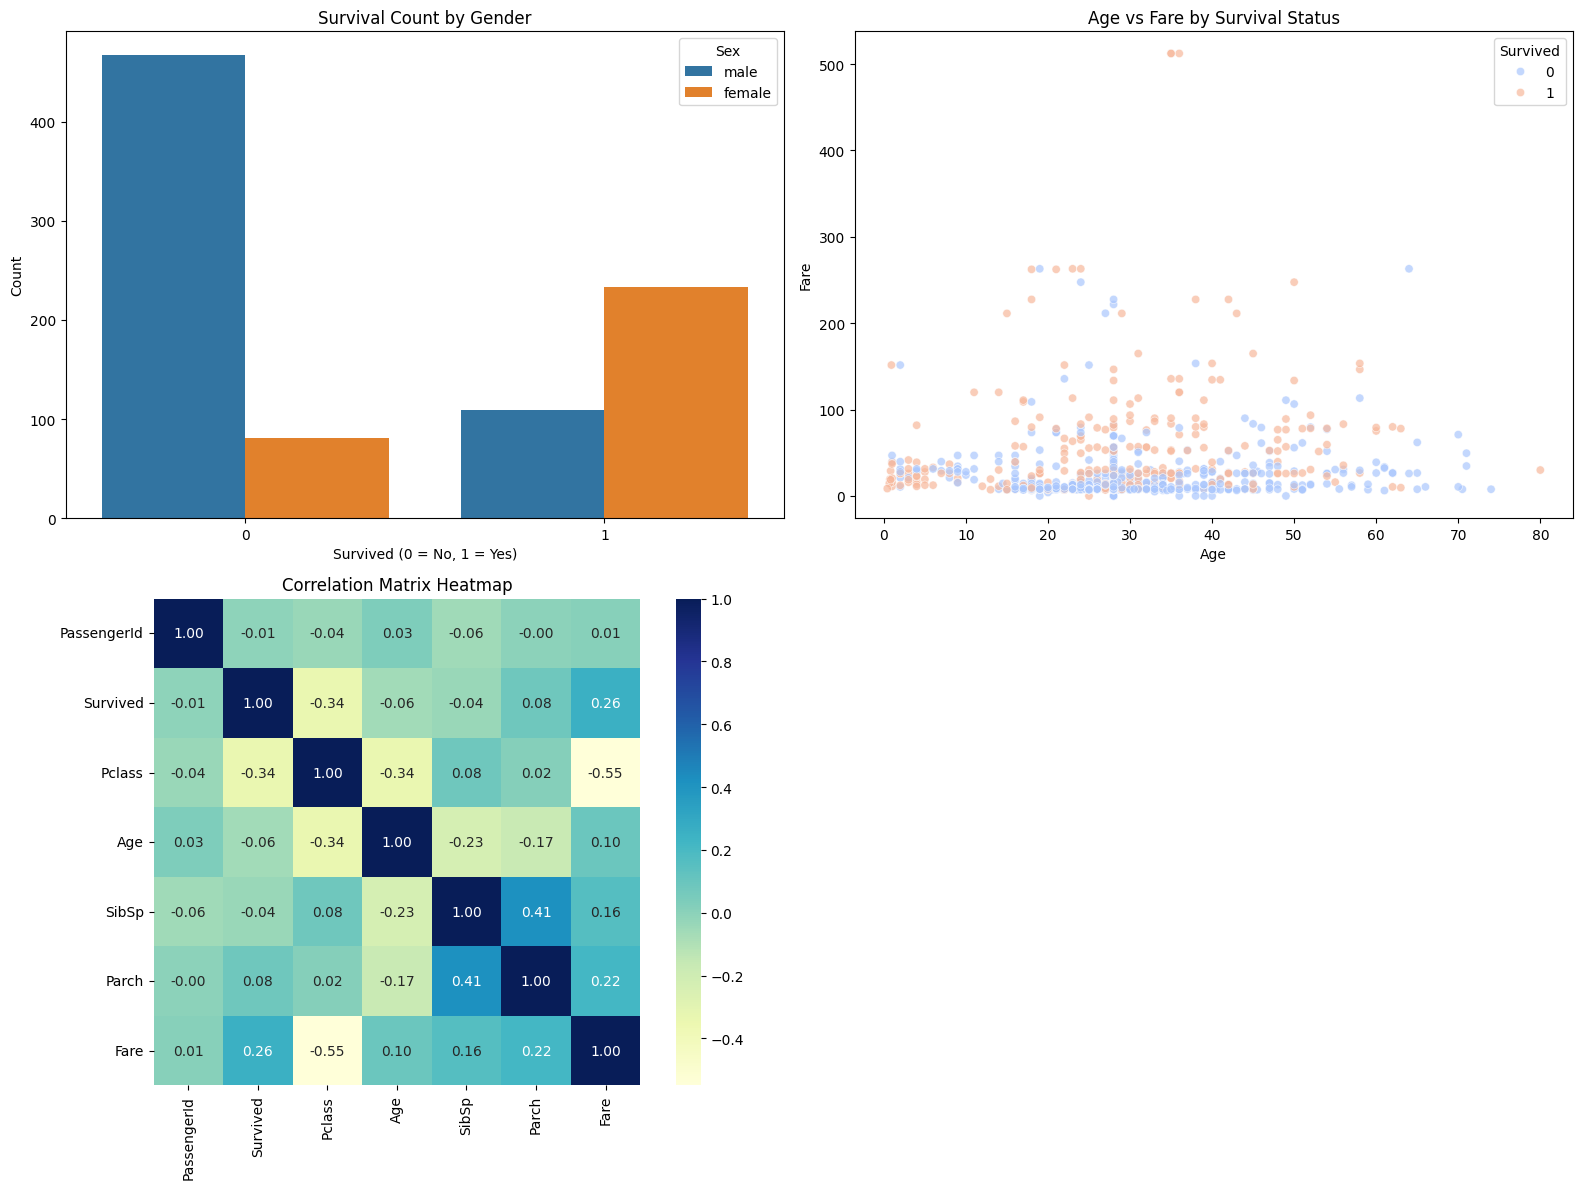

In [22]:
# Code for visualizations
plt.figure(figsize=(16, 12))

# Bar chart
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Scatter plot
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.7)
plt.title('Age vs Fare by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')

# Heatmap of correlations
plt.subplot(2, 2, 3)
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')

plt.tight_layout()
plt.show()
